In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('Training.xlsb')

In [3]:
df.to_csv('training.csv', index=False)

In [4]:
# Удалила ID
df.drop(['ID'], axis=1, inplace=True)

In [5]:
df.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,MARKER
0,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,33.750000,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,33.250000,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,38.583333,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,61.250000,...,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,48.583333,...,0 Zero,property,No,No couple,Yes,No,No,No,No,0


In [6]:
# Можно заметить, что в каждом столбце значений 89734, то есть пропущенных нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       89734 non-null  float64
 1   B       89734 non-null  float64
 2   C       89734 non-null  float64
 3   D       89734 non-null  float64
 4   E       89734 non-null  float64
 5   F       89734 non-null  float64
 6   G       89734 non-null  int64  
 7   H       89734 non-null  float64
 8   I       89734 non-null  object 
 9   J       89734 non-null  float64
 10  K       89734 non-null  object 
 11  L       89734 non-null  int64  
 12  M       89734 non-null  object 
 13  N       89734 non-null  object 
 14  O       89734 non-null  object 
 15  P       89734 non-null  object 
 16  Q       89734 non-null  object 
 17  R       89734 non-null  object 
 18  S       89734 non-null  object 
 19  T       89734 non-null  object 
 20  U       89734 non-null  object 
 21  V       89734 non-null  object 
 22

### Исследую проблемы с числовыми переменными

In [7]:
# Отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'L', 'MARKER'],
      dtype=object)

In [8]:
df[numeric_cols].isnull().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
J         0
L         0
MARKER    0
dtype: int64

видно, что пропущенных значений нет

### Выбросы в числовых переменных

In [9]:
# просматрела сводную статистику в числовых переменных

print(round(df[numeric_cols].describe()),2)

             A        B        C        D        E        F        G        H  \
count  89734.0  89734.0  89734.0  89734.0  89734.0  89734.0  89734.0  89734.0   
mean       0.0      0.0     86.0    549.0      1.0      1.0      8.0      1.0   
std        0.0      0.0    105.0    449.0      1.0      1.0      5.0      1.0   
min        0.0      0.0      0.0     50.0      0.0      0.0      2.0      0.0   
25%        0.0      0.0     21.0    227.0      0.0      0.0      4.0      0.0   
50%        0.0      0.0     50.0    409.0      1.0      0.0      5.0      0.0   
75%        0.0      0.0    109.0    747.0      1.0      1.0     13.0      0.0   
max        7.0      1.0   2682.0   4999.0     35.0     10.0     24.0      4.0   

             J        L   MARKER  
count  89734.0  89734.0  89734.0  
mean      41.0    104.0      0.0  
std       11.0    100.0      0.0  
min       21.0      0.0      0.0  
25%       32.0     29.0      0.0  
50%       40.0     69.0      0.0  
75%       50.0    144.0  

видим, что столбцы A, B, C, D, E, F, L, H содержат выбросы


Визуализирую выбросы в вышеуказанных переменных.

Text(0, 0.5, 'H')

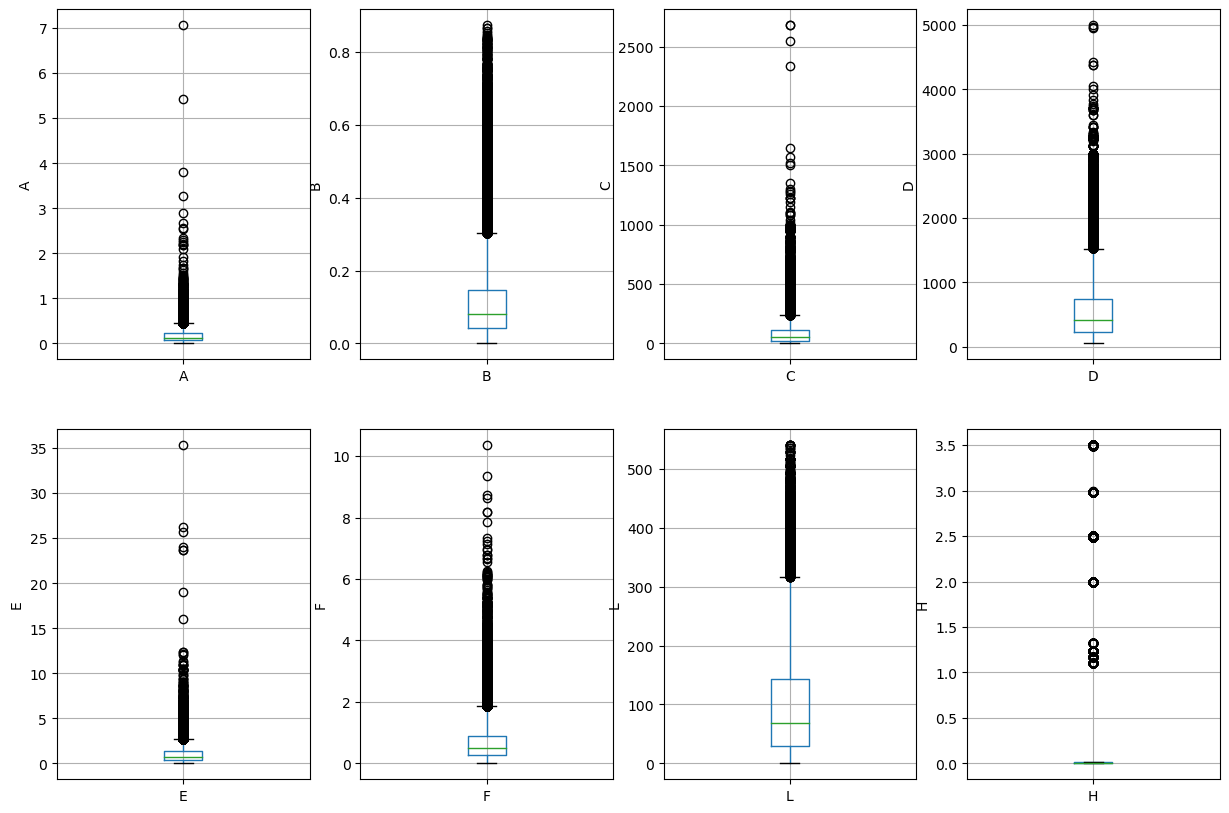

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
fig = df.boxplot(column='A')
fig.set_title('')
fig.set_ylabel('A')

plt.subplot(2, 4, 2)
fig = df.boxplot(column='B')
fig.set_title('')
fig.set_ylabel('B')

plt.subplot(2, 4, 3)
fig = df.boxplot(column='C')
fig.set_title('')
fig.set_ylabel('C')

plt.subplot(2, 4, 4)
fig = df.boxplot(column='D')
fig.set_title('')
fig.set_ylabel('D')

plt.subplot(2, 4, 5)
fig = df.boxplot(column='E')
fig.set_title('')
fig.set_ylabel('E')

plt.subplot(2, 4, 6)
fig = df.boxplot(column='F')
fig.set_title('')
fig.set_ylabel('F')

plt.subplot(2, 4, 7)
fig = df.boxplot(column='L')
fig.set_title('')
fig.set_ylabel('L')

plt.subplot(2, 4, 8)
fig = df.boxplot(column='H')
fig.set_title('')
fig.set_ylabel('H')

Приведенные выше диаграммы подтверждают, что в этих переменных много выбросов.

### Изучение целевой функции

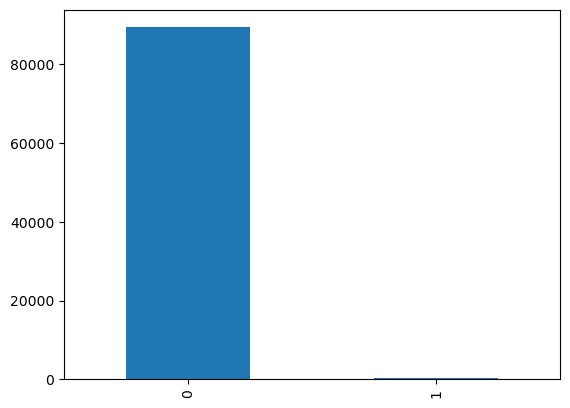

In [11]:
df['MARKER'].value_counts().plot.bar();

По графику видно, что есть дисбаланс. Поэтому при обучении это надо учитывать

### Замена категориальных признаков

In [12]:
binary_gender = {'Man': 0, 'Woman': 1}
df['I'] = df['I'].map(binary_gender)

In [13]:
region_values = {'Brest region': 1, 'Vitebsk region': 2, 'Gomel region': 3,
                 'Grodno region': 4, 'Minsk region': 5,'Mogilev region': 6, 'Minsk': 7}
df['K'] = df['K'].map(region_values)

In [14]:
number_values = {'2 Two': 2, '1 One': 1, '0 Zero': 0, '3 Three': 3, 'More than 3': 4}
df['P'] = df['P'].map(number_values)

In [15]:
binary_answer = {'No': 0, 'Yes': 1}
df['R'] = df['R'].map(binary_answer)
df['T'] = df['T'].map(binary_answer)
df['U'] = df['U'].map(binary_answer)
df['W'] = df['W'].map(binary_answer)
df['X'] = df['X'].map(binary_answer)

In [16]:
value_V = {'No': 0, 'Yes': 1, 'Few': 2}
df['V'] = df['V'].map(value_V)

In [17]:
label_encoder = LabelEncoder()
df['M'] = label_encoder.fit_transform(df['M'])
df['N'] = label_encoder.fit_transform(df['N'])
df['O'] = label_encoder.fit_transform(df['O'])
df['Q'] = label_encoder.fit_transform(df['Q'])
df['S'] = label_encoder.fit_transform(df['S'])

In [18]:
df.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,MARKER
0,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,1,33.750000,...,2,1,0,4,1,1,0,1,0,0
1,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,1,33.250000,...,2,0,0,4,1,1,1,1,0,0
2,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,1,38.583333,...,1,1,0,0,0,1,0,1,0,0
3,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,1,61.250000,...,0,1,0,0,1,1,2,1,0,0
4,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,1,48.583333,...,0,1,0,0,1,0,0,0,0,0


### Построю корреляционную матрицу

In [19]:
corr_matrix = df.corr()

Так как значений у нас много, то можно убрать сильно коррелирующие между собой признаки(>90%):

In [20]:
drop = []
for i in corr_matrix.columns.drop('MARKER'):
    corr = corr_matrix[i].index
    for a in corr:
        if corr_matrix[i][a] > 0.9 and i != a:
            if corr_matrix['MARKER'][i] > corr_matrix['MARKER'][a]:
                drop.append(a) if a not in drop else 0
            else:
                drop.append(i) if i not in drop else 0

df.drop(drop, axis=1, inplace=True)

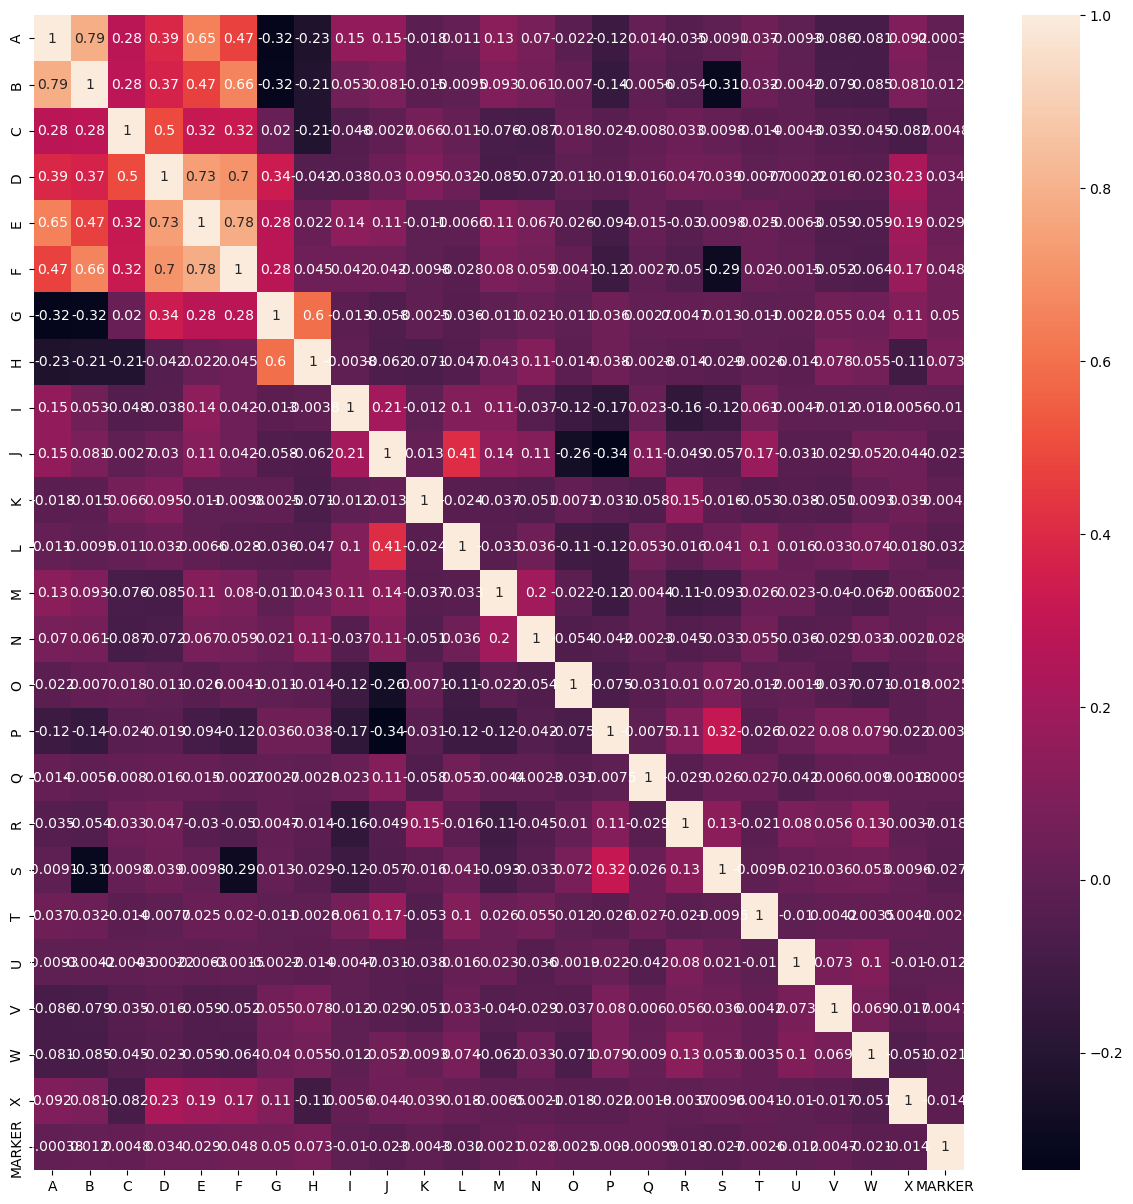

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True)

plt.show() # по оси х признаки, сильно коррелирующие между собой

In [22]:
corr_matrix['MARKER']

A        -0.000378
B         0.012089
C         0.004778
D         0.034191
E         0.029283
F         0.047738
G         0.050280
H         0.072940
I        -0.010439
J        -0.023146
K        -0.004298
L        -0.031630
M         0.002134
N         0.028453
O         0.002519
P         0.002978
Q        -0.000991
R        -0.018049
S        -0.026752
T        -0.002565
U        -0.011614
V         0.004652
W        -0.021374
X        -0.013752
MARKER    1.000000
Name: MARKER, dtype: float64

Далее уберу признаки, корреляция которых <0.5% с целевой переменной «MARKER» и построила диаграмму для оставшихся:

In [23]:
largest = corr_matrix['MARKER'][np.abs(corr_matrix['MARKER'] > 0.005)].index
df = df[largest]
df.head()

,B,D,E,F,G,H,N,MARKER
0,0.099389,799.90,1.777556,0.888778,13,3.49,3,0
1,0.021264,173.03,0.384511,0.190143,13,3.49,3,0
2,0.067073,329.90,0.599818,0.599818,13,3.49,3,0
3,0.052700,235.65,0.471300,0.471300,13,3.49,3,0
4,0.141880,634.45,1.268900,1.268900,13,3.49,3,0


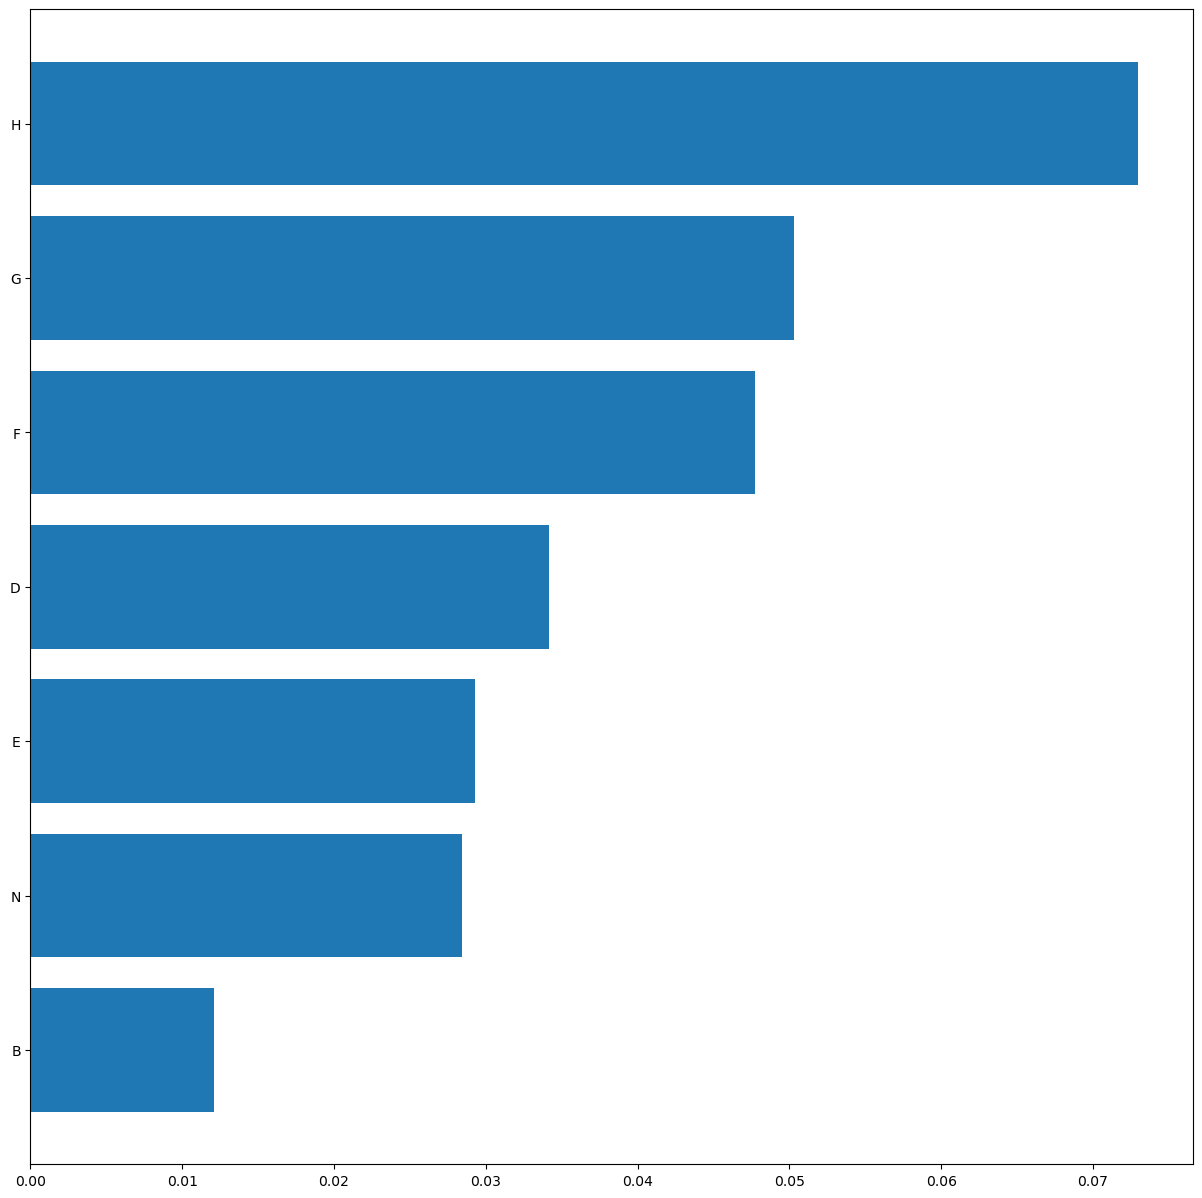

In [24]:
plt.figure(figsize=(15, 15))
largest_corr = corr_matrix['MARKER'][largest].sort_values().drop('MARKER')

plt.barh(largest_corr.index, np.abs(largest_corr))

plt.show()

# признаки наиболее коррелирующие с целевой переменной без тех,
# что сильно коррелируют между собой

In [25]:
# Сохранила данные
df.to_csv('df_clean.csv', index=False)

In [26]:
# В итоге получилось
df = pd.read_csv('df_clean.csv')
df.head()

,B,D,E,F,G,H,N,MARKER
0,0.099389,799.90,1.777556,0.888778,13,3.49,3,0
1,0.021264,173.03,0.384511,0.190143,13,3.49,3,0
2,0.067073,329.90,0.599818,0.599818,13,3.49,3,0
3,0.052700,235.65,0.471300,0.471300,13,3.49,3,0
4,0.141880,634.45,1.268900,1.268900,13,3.49,3,0


Далее сделала так, чтобы значения признаков изменялись от 0 до 1 с помощью sklearn MinMaxScaler():

In [27]:
scale = MinMaxScaler()
for col in df.columns.drop(['MARKER']):
    df[col] = scale.fit_transform(df[col].values.reshape(-1, 1))
df.head()

,B,D,E,F,G,H,N,MARKER
0,0.113713,0.151529,0.050303,0.085846,0.5,0.997143,1.0,0
1,0.024327,0.024864,0.010881,0.018365,0.5,0.997143,1.0,0
2,0.076739,0.056561,0.016974,0.057936,0.5,0.997143,1.0,0
3,0.060294,0.037517,0.013337,0.045522,0.5,0.997143,1.0,0
4,0.162328,0.118098,0.035908,0.122563,0.5,0.997143,1.0,0


Затем разбила данные на тестовые и тренировочные части: 

#### Так как у меня представлен огромный дисбаланс классов, его обязательно надо устранять.  
#### Я буду устранять с помощью передискретизации с заменой  

In [28]:
columns_len = df.columns.shape[0]

x = df.iloc[:, 0:columns_len - 1]
y = df.iloc[:, columns_len - 1]

In [29]:
from sklearn.utils import resample
x_resampled = resample(x[y==1], n_samples=x[y==0].shape[0], random_state=1000)

x_ = np.concatenate((x[y==0], x_resampled))
y_ = np.concatenate((y[y==0], np.ones(shape=(x[y==0].shape[0],), dtype=np.int32)))

print(x_[y_==0].shape)
print(x_[y_==1].shape)

(89392, 7)
(89392, 7)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=8)

### Обучение модели

In [31]:
# class_weight = 'balanced' - для балансировки 
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

Снимаю метрики логистической регрессии

In [32]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.8374559720395995
precision: 0.7551110619958007
recall: 0.763890441587479
f1: 0.7594753806824497
logloss: 8.361193396821811


Блогодаря устранению дисбаланса модель показала себя довольно хорошо

### Построю Confusion Matrix

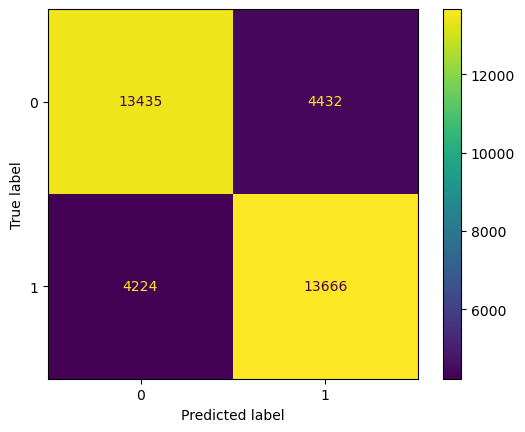

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     17867
           1       0.76      0.76      0.76     17890

    accuracy                           0.76     35757
   macro avg       0.76      0.76      0.76     35757
weighted avg       0.76      0.76      0.76     35757



In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

In [34]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[13435,  4432],
       [ 4224, 13666]], dtype=int64)

Построила кривую ROC. Чем выше AUC (площадь под кривой), тем точнее наша модель может предсказывать результаты

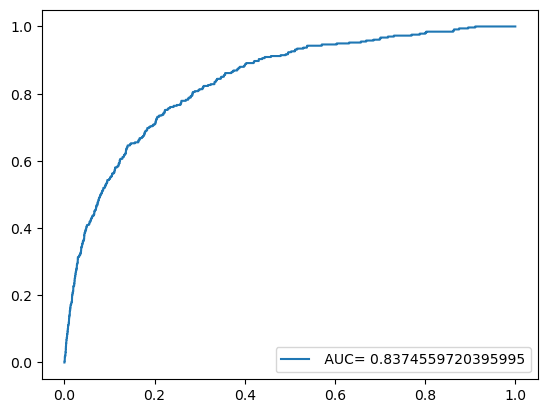

In [35]:
y_pred_proba = lr. predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()